In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

import pickle

pickle_in = open("../Preprosesing-data/x_y.pickle","rb")
X = pickle.load(pickle_in)

In [59]:
X[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
X_train = X[:-12]
X_test = X[-12:]

In [61]:
X_train=np.array(X_train)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],-1)
X_test = np.array(X_test).reshape(-1,83,114)

X_train.shape

(336, 83, 114)

In [62]:
X_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
n_input = 12
n_features = 2
generator = TimeseriesGenerator(X_train, X_train, length=n_input, batch_size=6)

In [74]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [75]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                33000     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 38,201
Trainable params: 38,201
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit_generator(generator,epochs=90)

Epoch 1/90


ValueError: Error when checking input: expected lstm_9_input to have 3 dimensions, but got array with shape (6, 12, 83, 114)

In [16]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0.36102168],
        [0.59852961],
        [0.66844751],
        [0.56617411],
        [0.35087187],
        [0.51669255],
        [0.32203385],
        [0.53238923],
        [0.46686082],
        [0.58345887],
        [0.39543495],
        [0.01024521]]])

In [17]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list

[array([0.21714507], dtype=float32),
 array([0.3952011], dtype=float32),
 array([0.5180369], dtype=float32),
 array([0.4728811], dtype=float32),
 array([0.29984212], dtype=float32),
 array([0.2173075], dtype=float32),
 array([0.24577525], dtype=float32),
 array([0.42272118], dtype=float32),
 array([0.5846771], dtype=float32),
 array([0.5760313], dtype=float32),
 array([0.3303771], dtype=float32),
 array([0.21372034], dtype=float32)]

In [18]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


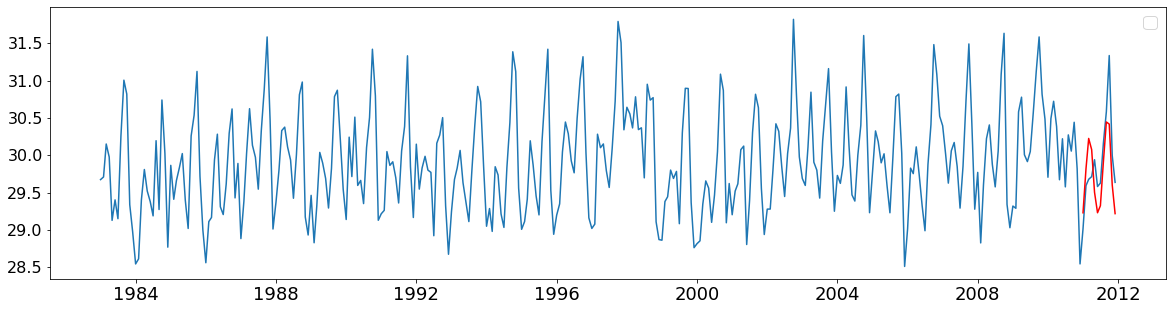

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['rata2'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [20]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [0.42715162]


In [21]:
train = df

In [22]:
scaler.fit(train)
train = scaler.transform(train)

In [23]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [24]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
56/56 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 2/90
56/56 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 3/90
56/56 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 4/90
56/56 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 5/90
56/56 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 6/90
56/56 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 7/90
56/56 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 8/90
56/56 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 9/90
56/56 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 10/90
56/56 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 11/90
56/56 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 12/90
56/56 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 13/90
56/56 [==============================

In [25]:
train

array([[0.3514344 ],
       [0.3620887 ],
       [0.49551319],
       [0.4429382 ],
       [0.18651095],
       [0.26942046],
       [0.19326125],
       [0.52678381],
       [0.75384873],
       [0.6976087 ],
       [0.24984992],
       [0.14092356],
       [0.01014274],
       [0.03080538],
       [0.26854018],
       [0.39229268],
       [0.30533839],
       [0.26253795],
       [0.20464018],
       [0.50889602],
       [0.23041026],
       [0.67360787],
       [0.45728733],
       [0.07802448],
       [0.40912725],
       [0.27184774],
       [0.34819662],
       [0.40041748],
       [0.45677515],
       [0.26878535],
       [0.1537461 ],
       [0.5282248 ],
       [0.61225715],
       [0.78918549],
       [0.36472509],
       [0.14749501],
       [0.014986  ],
       [0.1814864 ],
       [0.19827409],
       [0.43153538],
       [0.53528664],
       [0.24143094],
       [0.21003951],
       [0.33382247],
       [0.53891734],
       [0.6373878 ],
       [0.27733417],
       [0.416

In [26]:
pred_list = []

batch = data_4[-60:-48].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch = data_4[-48:-36].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch = data_4[-36:-24].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch = data_4[-24:-12].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

batch = data_4[-12:].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [27]:
batch

array([[[0.33344042],
        [0.33888   ],
        [0.42295447],
        [0.49384931],
        [0.4718855 ],
        [0.33570787],
        [0.27627635],
        [0.43846107],
        [0.58231449],
        [0.7674827 ],
        [0.53898668],
        [0.2828663 ]]])

In [28]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,61) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [29]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-60:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

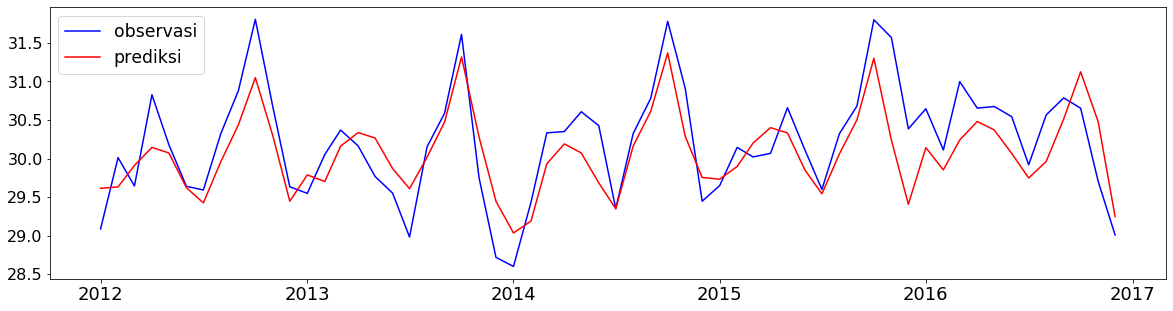

In [30]:
df_asli = data_1
plt.figure(figsize=(20, 5))
# plt.plot(df_proj.index, df_proj['data'])
plt.plot(data_5[-60:].index, data_5['rata2'][-60:],color='b', label="observasi")
plt.plot(df_proj[-60:].index, df_proj['Prediction'][-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

No handles with labels found to put in legend.


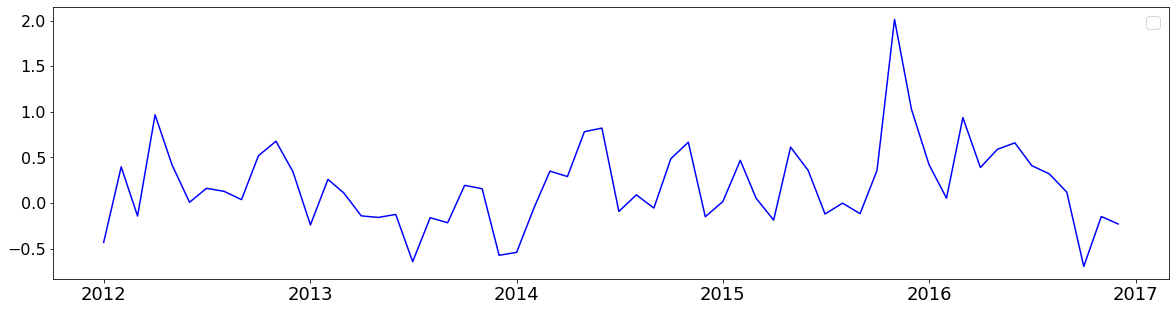

In [28]:
plt.figure(figsize=(20, 5))
MAE = data_5['rata2'][-60:]-df_proj['Prediction'][-60:]
plt.plot(data_5[-60:].index, MAE,color='b')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [29]:
MAE

bulan
2012-01-01   -0.431796
2012-02-01    0.396377
2012-03-01   -0.142920
2012-04-01    0.967616
2012-05-01    0.418388
2012-06-01    0.008153
2012-07-01    0.161043
2012-08-01    0.128629
2012-09-01    0.037257
2012-10-01    0.519024
2012-11-01    0.677717
2012-12-01    0.344032
2013-01-01   -0.240355
2013-02-01    0.259566
2013-03-01    0.110811
2013-04-01   -0.141024
2013-05-01   -0.158184
2013-06-01   -0.125188
2013-07-01   -0.643402
2013-08-01   -0.160876
2013-09-01   -0.216460
2013-10-01    0.193917
2013-11-01    0.156479
2013-12-01   -0.573231
2014-01-01   -0.541481
2014-02-01   -0.050262
2014-03-01    0.349544
2014-04-01    0.290484
2014-05-01    0.782190
2014-06-01    0.822089
2014-07-01   -0.092243
2014-08-01    0.089353
2014-09-01   -0.055299
2014-10-01    0.485307
2014-11-01    0.667321
2014-12-01   -0.150455
2015-01-01    0.015568
2015-02-01    0.467991
2015-03-01    0.051890
2015-04-01   -0.187176
2015-05-01    0.612860
2015-06-01    0.358908
2015-07-01   -0.120555
2015-

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 15,601
Trainable params: 15,601
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.save('2_layer_50_100_e90.h5')